<a target="_blank" href="https://colab.research.google.com/github/evaalonsoortiz/ELE8812-demos/blob/main/Demos/Lesson%203/Le%C3%A7on_3_Demo_sin.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# ELE8812 - Représentation fréquentielle

## Démo : Effet de l'échantillonnage d'un nombre exact de périodes d'un signal périodique

Lors du calcul de la transformée de Fourier discrète (TFD) d’un signal, on pose l’assomption que le signal se répète à l’infini dans le temps (e.g. 1ère répétition entre 1 et N, 2e répétition entre N+1 et 2N, etc…). Ainsi, lorsqu’un nombre fractionnaire de périodes du signal est échantillonné, il y a présence de discontinuités aux endroits où une répétition du signal se termine et où la suivante débute. Ceci introduit dans le spectre de fréquences des fréquences qui sont en réalité absentes du signal.

Dans ce démo, la TF d’un cosinus pur échantillonné avec un nombre entier de période est comparée à celle obtenue lorsque le cosinus est échantillonné avec un nombre fractionnaire de périodes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Exemple 1

2 périodes d’un cosinus pur sont échantillonnées (total de 64 échantillons). Il n’y a pas de discontinuités dans le signal répété. On obtient le spectre de fréquences attendu : un delta de Dirac à la fréquence positive et négative du cosinus pur.

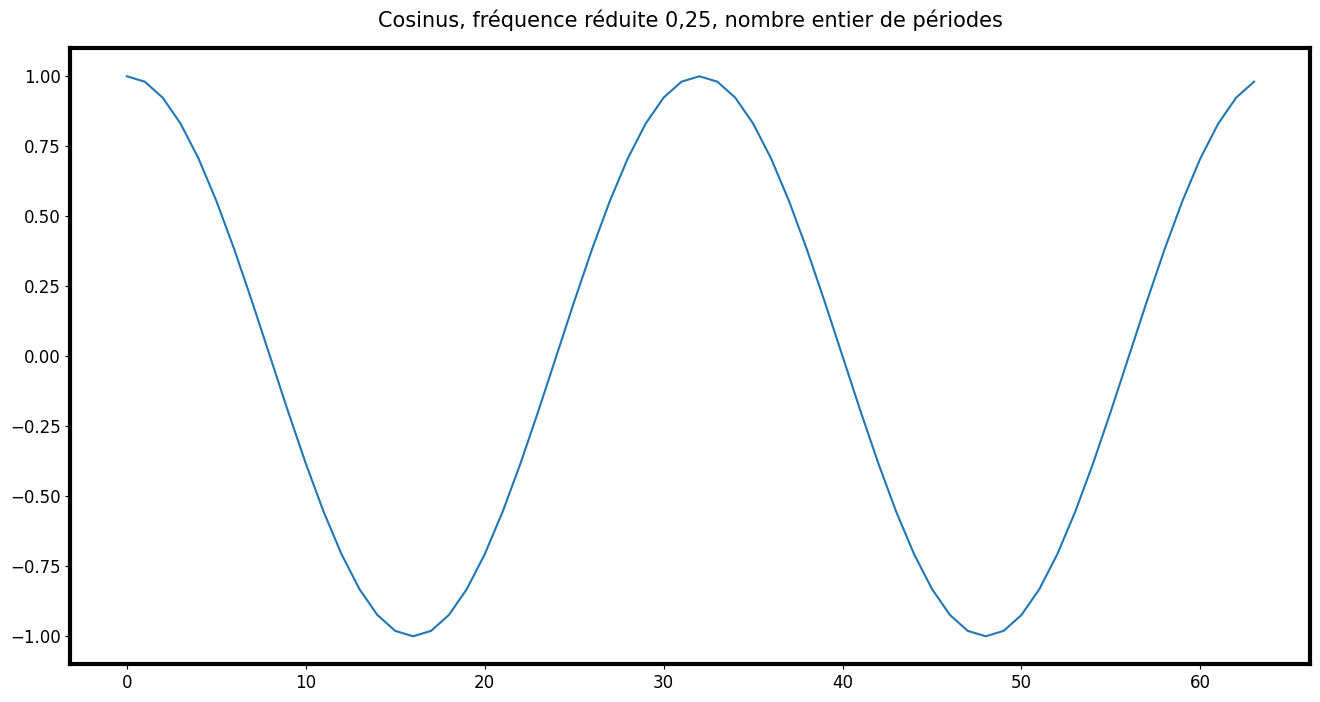

In [ ]:
N = 64;

t1 = np.arange(0,N)
f = 2

x = np.cos(2*np.pi*f*t1/N);

plt.plot(t1, x); plt.title('Cosinus, fréquence réduite 0,25, nombre entier de périodes')
plt.show()

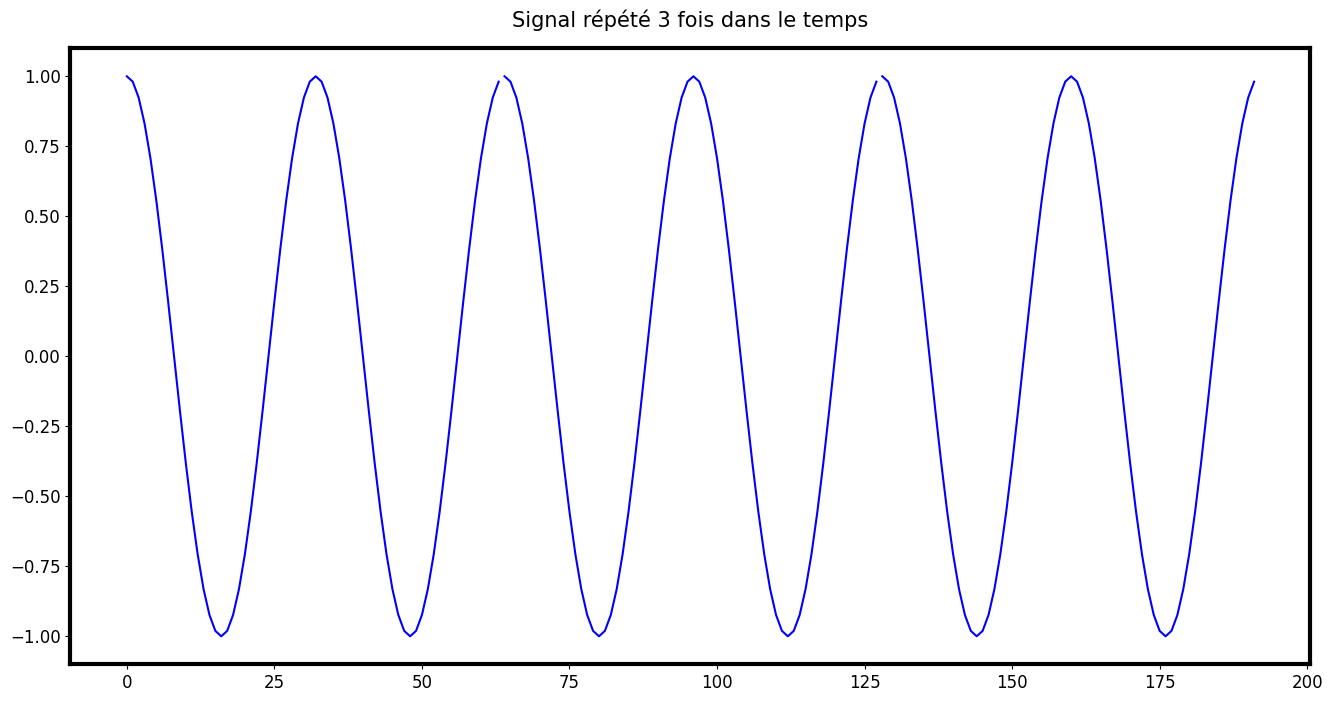

In [ ]:
plt.plot(t1, x,'b');
plt.plot(t1+len(t1), x, 'b');
plt.plot(t1+len(t1)*2, x, 'b');
plt.title('Signal répété 3 fois dans le temps')
plt.show()

<ipython-input-20-7104729c0f9e>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(nu, abs(X),markerfmt='bD', use_line_collection=True)


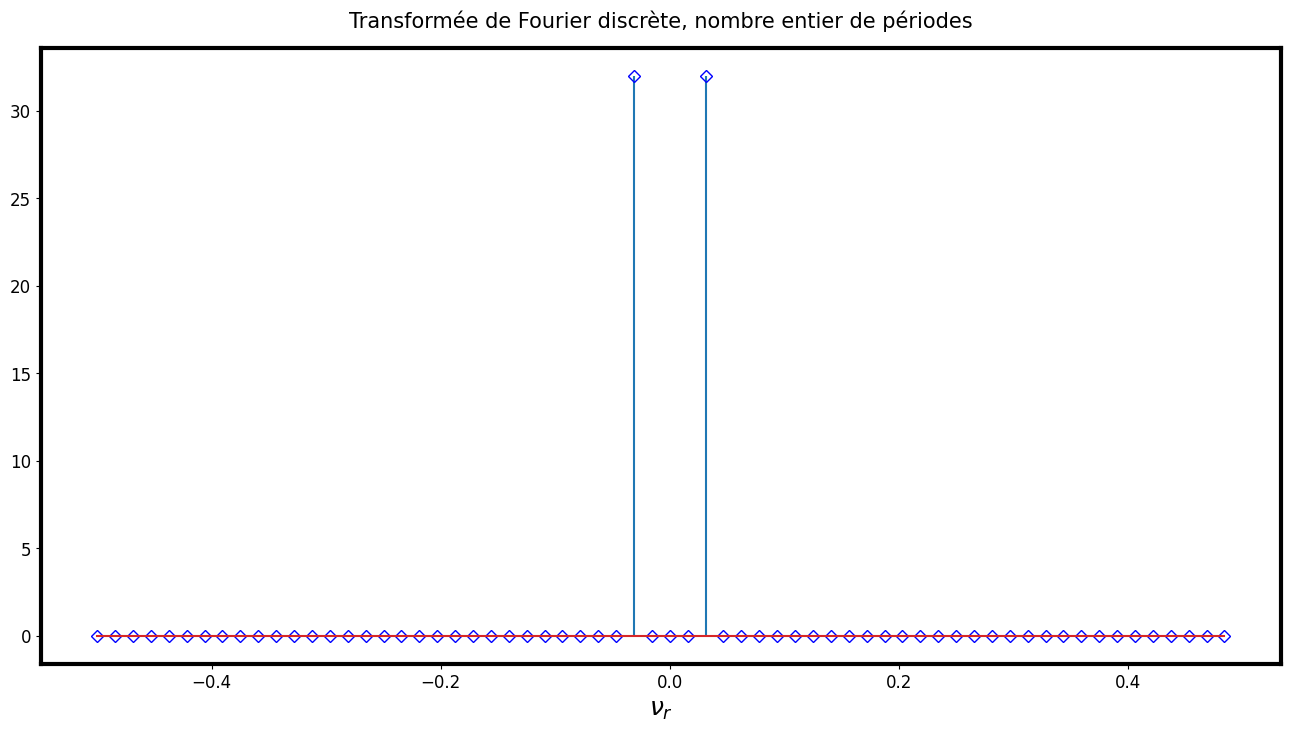

In [ ]:
X = np.fft.fftshift(np.fft.fft(x))
nu = np.arange(0,len(x))/len(x)
nu[nu>=0.5] += -1
nu = np.fft.fftshift(nu);

markerline, stemlines, baseline = plt.stem(nu, abs(X),markerfmt='bD', use_line_collection=True)
markerline.set_markerfacecolor('none')
plt.xlabel('$\\nu_r$',fontsize=18)
plt.title('Transformée de Fourier discrète, nombre entier de périodes')
plt.show()

## Exemple 2

Un nombre fractionnaire de périodes du même signal est échantillonné (total de 55 échantillons). Des discontinuités sont présentes dans le signal répété. Ainsi le spectre obtenu est élargi, des fréquences absentes du cosinus pur sont présentes dans le spectre. 

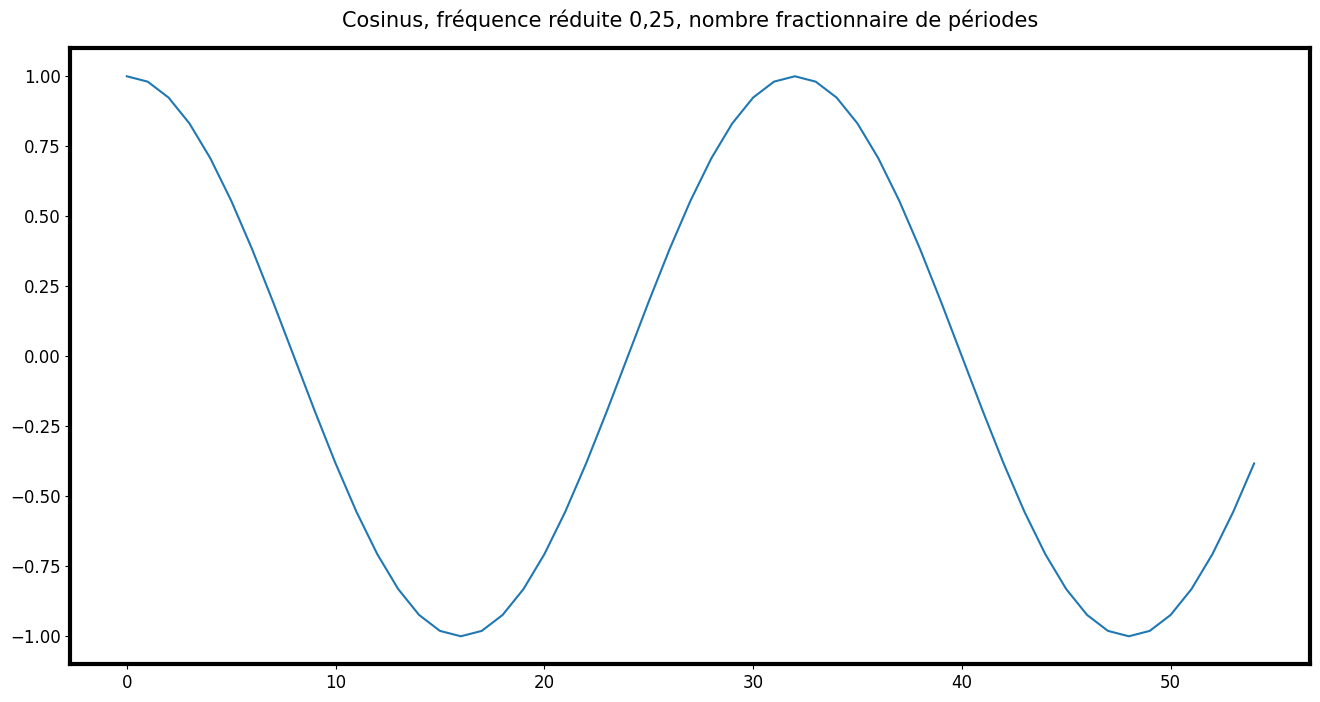

In [ ]:
t2 = np.arange(0,N-9)
f = 2;

x2 = np.cos(2*np.pi*f*t2/N)

plt.plot(t2, x2); plt.title('Cosinus, fréquence réduite 0,25, nombre fractionnaire de périodes')
plt.show()

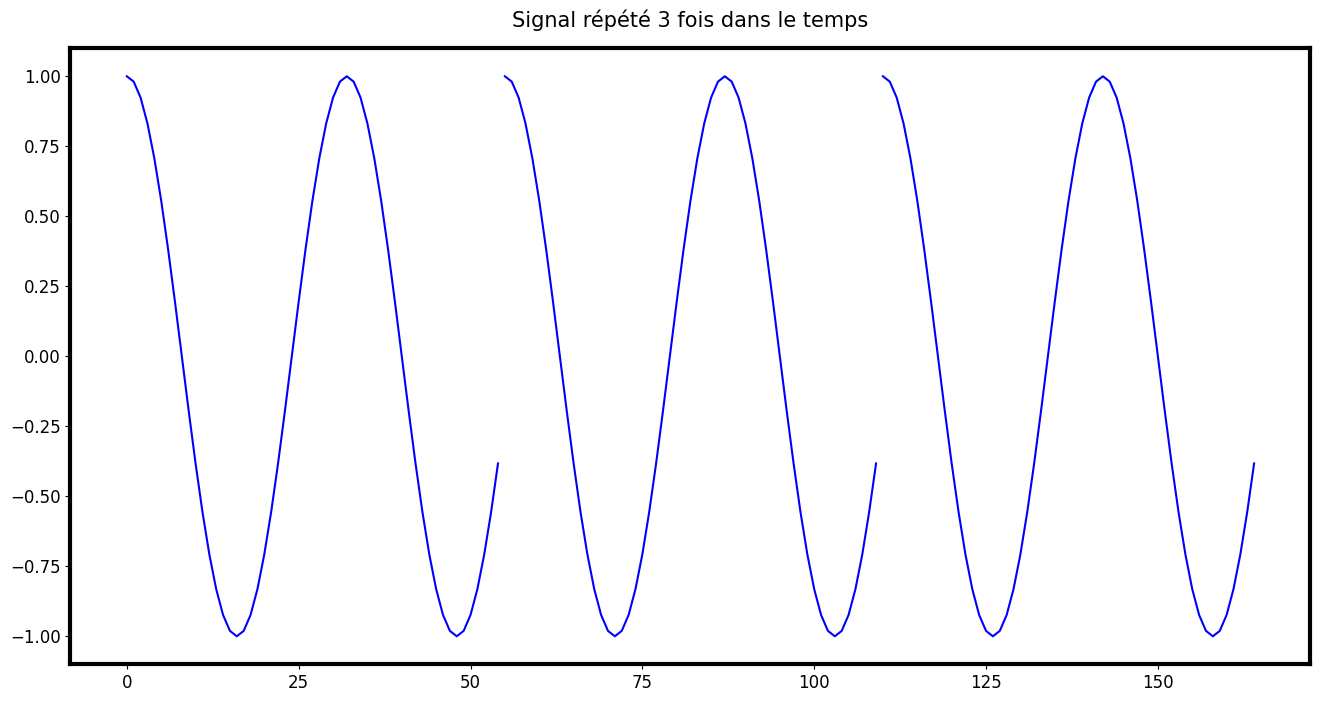

In [ ]:
plt.plot(t2, x2,'b');
plt.plot(t2+len(t2), x2, 'b');
plt.plot(t2+len(t2)*2, x2, 'b');
plt.title('Signal répété 3 fois dans le temps')
plt.show()

<ipython-input-22-d749202129a2>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(nu, abs(X), 'b', markerfmt='bD', label='nombre entier de périodes', use_line_collection=True)
<ipython-input-22-d749202129a2>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(nu2, abs(X2), 'r', markerfmt='rD', label='nombre fractionnaire de périodes', use_line_collection=True)


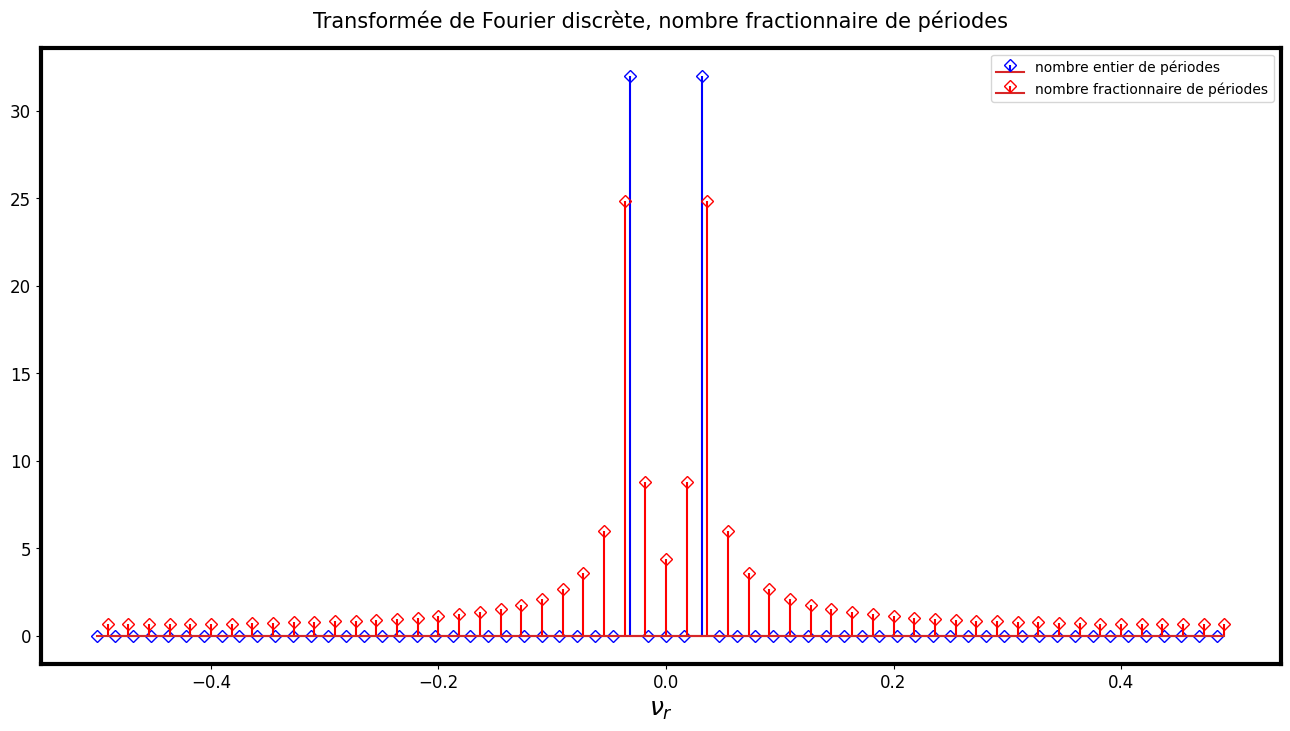

In [ ]:
X2 = np.fft.fftshift(np.fft.fft(x2));
nu2 = np.arange(0,len(x2))/len(x2)
nu2[nu2>=0.5] += -1
nu2 = np.fft.fftshift(nu2);

markerline, stemlines, baseline = plt.stem(nu, abs(X), 'b', markerfmt='bD', label='nombre entier de périodes', use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline, stemlines, baseline = plt.stem(nu2, abs(X2), 'r', markerfmt='rD', label='nombre fractionnaire de périodes', use_line_collection=True)
markerline.set_markerfacecolor('none')

plt.xlabel('$\\nu_r$',fontsize=18)
plt.title('Transformée de Fourier discrète, nombre fractionnaire de périodes')
plt.legend()
plt.show()